# Capstone week 3 assignment (part3)

### Import libraries and geospacial data from previous notebook

In [25]:
#Importing libs
import pandas as pd
import numpy as np
import requests # for url requests
df = pd.read_csv('geodf.csv')

### Select Downtown Toronto	 as borough

In [52]:

downtown_toronto = df[df['Borough'].str.contains('Downtown Toronto')]
downtown_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
51,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
53,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
54,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [147]:
lat = downtown_toronto.loc[(50, 'Latitude')]
lng = downtown_toronto.loc[(50, 'Longitude')]


### Function that retrive all neighborhoods in Downtown Toronto borough

In [69]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    radius=500
    LIMIT=100
    CLIENT_ID = 'QZAY55HWG1QLLRKHQK2SNR3UFCTZZGM0UVET4H435C0UCNX0' # your Foursquare ID
    CLIENT_SECRET = '4M024DZ15YCLRVYDATYRL3GLHDL4G03M4LXVARNHB5EMEJYC' # your Foursquare Secret
    VERSION = '20180605'
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Create DownTown Toronto venues dataframe

In [70]:
downtown_toronto_venues = getNearbyVenues(names=downtown_toronto['Neighborhood'],
                                   latitudes=downtown_toronto['Latitude'],
                                   longitudes=downtown_toronto['Longitude']
                                  )

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie


In [83]:
downtown_toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


In [84]:
downtown_toronto_venues.shape

(1286, 7)

In [85]:
print('There are {} uniques categories.'.format(len(downtown_toronto_venues['Venue Category'].unique())))

There are 205 uniques categories.


### Analyze Each Neighborhood

In [128]:
# One hot encoding
downtown_toronto_onehot = pd.get_dummies(downtown_toronto_venues[['Venue Category']], prefix="", prefix_sep="")
downtown_toronto_onehot.shape

(1286, 205)

In [129]:
# add neighborhood column back to dataframe
downtown_toronto_onehot['Neighborhood'] = downtown_toronto_venues['Neighborhood']

In [133]:
neigh = downtown_toronto_onehot.columns.tolist()
neigh

['Neighborhood',
 'Accessories Store',
 'Adult Boutique',
 'Afghan Restaurant',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Butcher',
 'Café',
 'Camera Store',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Arts Building',
 'College Gym',
 'College Rec Center',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Comic S

In [131]:
# move neighborhood column to the first column
fixed_columns = [downtown_toronto_onehot.columns[140]] + list(downtown_toronto_onehot.columns[:-1])
fixed_columns.pop(141)
downtown_toronto_onehot = downtown_toronto_onehot[fixed_columns]

### Grouping rows by neighborhood and take the mean value for each category

In [134]:
downtown_toronto_grouped = downtown_toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [136]:
downtown_toronto_grouped.shape

(18, 204)

In [137]:
# a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Dataframe with 10 top venues for each neighborhood.

In [139]:
num_top_venues = 10#

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_toronto_grouped['Neighborhood']

for ind in np.arange(downtown_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Thai Restaurant,Café,Steakhouse,Bar,American Restaurant,Hotel,Bakery,Restaurant,Sushi Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Bakery,Farmers Market,Seafood Restaurant,Steakhouse,Cheese Shop,Café,Pub
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Airport Gate,Boat or Ferry,Plane,Harbor / Marina,Airport Food Court,Airport,Sculpture Garden
3,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Italian Restaurant,Pub,Bakery,Pizza Place,Café,Japanese Restaurant,Beer Store,Bookstore
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Burger Joint,Sandwich Place,Bar,Bubble Tea Shop,Japanese Restaurant,Middle Eastern Restaurant,Salad Place


### Cluster Neighborhoods

In [141]:
# Import Kmeans clustering lib
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

downtown_toronto_clustering = downtown_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 0, 0, 3, 2, 0, 0, 0], dtype=int32)

#### A new dataframe that includes the cluster |as well as the top 10 venues for each neighborhood.

In [142]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_toronto_merged = downtown_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_toronto_merged = downtown_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Playground,Trail,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner
51,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0,Coffee Shop,Restaurant,Italian Restaurant,Pub,Bakery,Pizza Place,Café,Japanese Restaurant,Beer Store,Bookstore
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Gay Bar,Restaurant,Burger Joint,Pub,Gym,Bubble Tea Shop,Burrito Place
53,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,Coffee Shop,Park,Café,Pub,Bakery,Mexican Restaurant,Theater,Breakfast Spot,Electronics Store,Spa
54,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Pizza Place,Ramen Restaurant,Bar,Restaurant,Lingerie Store


### Map clusterd neighboors

In [146]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_merged['Latitude'], downtown_toronto_merged['Longitude'], downtown_toronto_merged['Neighborhood'], downtown_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [149]:
from IPython.display import Image

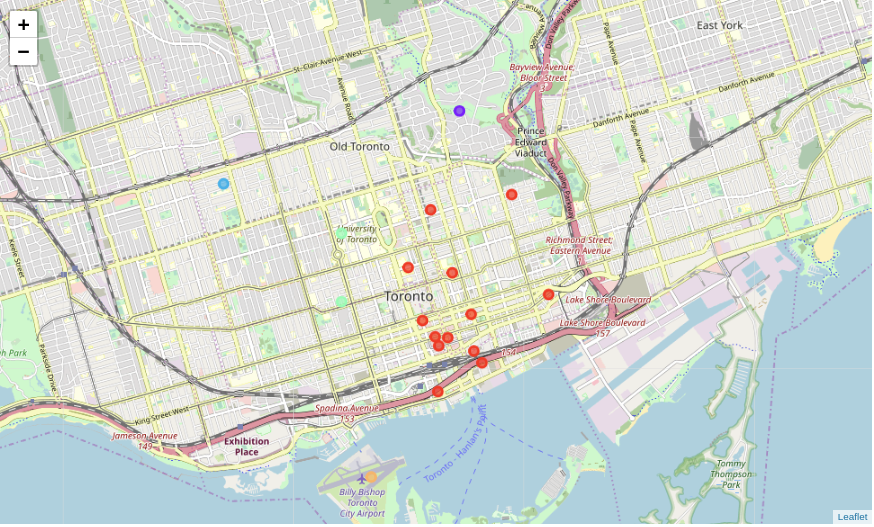

In [150]:
Image('map.png')